<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Project_United_Nations_Debate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Loading the dataset

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# extract the zip file
!unzip '/content/UNGDC19702018-200902-235056.zip'

Streaming output truncated to the last 5000 lines.
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._IRL_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._IRN_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._IRQ_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._ISL_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._ISR_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._ITA_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._JAM_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._JOR_47_1992.txt  
  inflating: UNGDC19702018-200902-235056/__MACOSX/Converted sessions/Session 47 - 1992/._JPN_

In [6]:
# folders of different sessions of speeches
!ls '/content/UNGDC19702018-200902-235056/Converted sessions'

'Session 25 - 1970'  'Session 38 - 1983'  'Session 51 - 1996'  'Session 64 - 2009'
'Session 26 - 1971'  'Session 39 - 1984'  'Session 52 - 1997'  'Session 65 - 2010'
'Session 27 - 1972'  'Session 40 - 1985'  'Session 53 - 1998'  'Session 66 - 2011'
'Session 28 - 1973'  'Session 41 - 1986'  'Session 54 - 1999'  'Session 67 - 2012'
'Session 29 - 1974'  'Session 42 - 1987'  'Session 55 - 2000'  'Session 68 - 2013'
'Session 30 - 1975'  'Session 43 - 1988'  'Session 56 - 2001'  'Session 69 - 2014'
'Session 31 - 1976'  'Session 44 - 1989'  'Session 57 - 2002'  'Session 70 - 2015'
'Session 32 - 1977'  'Session 45 - 1990'  'Session 58 - 2003'  'Session 71 - 2016'
'Session 33 - 1978'  'Session 46 - 1991'  'Session 59 - 2004'  'Session 72 - 2017'
'Session 34 - 1979'  'Session 47 - 1992'  'Session 60 - 2005'  'Session 73 - 2018'
'Session 35 - 1980'  'Session 48 - 1993'  'Session 61 - 2006'
'Session 36 - 1981'  'Session 49 - 1994'  'Session 62 - 2007'
'Session 37 - 1982'  'Session 50 - 1995'  'Ses

In [7]:
# speeches in a single folder
!ls '/content/UNGDC19702018-200902-235056/Converted sessions/Session 25 - 1970'

ALB_25_1970.txt  DOM_25_1970.txt  IRQ_25_1970.txt  MEX_25_1970.txt  SOM_25_1970.txt
ARG_25_1970.txt  DZA_25_1970.txt  ISL_25_1970.txt  MMR_25_1970.txt  SYR_25_1970.txt
AUS_25_1970.txt  ECU_25_1970.txt  ISR_25_1970.txt  NLD_25_1970.txt  TGO_25_1970.txt
AUT_25_1970.txt  FRA_25_1970.txt  ITA_25_1970.txt  NOR_25_1970.txt  THA_25_1970.txt
BEL_25_1970.txt  GBR_25_1970.txt  JPN_25_1970.txt  NZL_25_1970.txt  TTO_25_1970.txt
BLR_25_1970.txt  GHA_25_1970.txt  KEN_25_1970.txt  PAK_25_1970.txt  TUN_25_1970.txt
BOL_25_1970.txt  GIN_25_1970.txt  KHM_25_1970.txt  PER_25_1970.txt  TUR_25_1970.txt
BRA_25_1970.txt  GMB_25_1970.txt  KWT_25_1970.txt  PHL_25_1970.txt  UKR_25_1970.txt
CAN_25_1970.txt  GTM_25_1970.txt  LBN_25_1970.txt  PRY_25_1970.txt  URY_25_1970.txt
CMR_25_1970.txt  HND_25_1970.txt  LBR_25_1970.txt  RWA_25_1970.txt  USA_25_1970.txt
COG_25_1970.txt  HTI_25_1970.txt  LBY_25_1970.txt  SDN_25_1970.txt  VEN_25_1970.txt
COL_25_1970.txt  IDN_25_1970.txt  LKA_25_1970.txt  SGP_25_1970.txt  YUG_25_1

## 2. Data Pre-processing

In [8]:
# importing libraries
import glob
import pandas as pd
import re

In [9]:
# names of all the folders in the dataset
folders = glob.glob('/content/UNGDC19702018-200902-235056/Converted sessions/Session*')

In [10]:
# list of folders
folders

['/content/UNGDC19702018-200902-235056/Converted sessions/Session 27 - 1972',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 59 - 2004',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 44 - 1989',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 70 - 2015',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 38 - 1983',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 32 - 1977',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 40 - 1985',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 53 - 1998',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 34 - 1979',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 57 - 2002',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 55 - 2000',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Session 49 - 1994',
 '/content/UNGDC19702018-200902-235056/Converted sessions/Sessio

In [12]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns=['Country','Speech','Session','Year'])
df

,Country,Speech,Session,Year


In [13]:
# read speeches by USA
i = 0
# for each folder
for file in folders:
    # getting the txt file containing speech of USA
    speech = glob.glob(file+'/USA*.txt')
    # reading the txt file
    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("/")[-1]
        # Increment counter
        i += 1

In [14]:
# first 5 rows of the created dataset
df.head()

,Country,Speech,Session,Year
0,USA,During the past few years the world has made r...,27,1972
1,USA,Thank you for the honour of\naddressing the Ge...,59,2004
2,USA,﻿I am honoured to address the General Assembly...,44,1989
3,USA,Seventy years after the founding of the United...,70,2015
4,USA,﻿1.\tThank you for granting me the honor of sp...,38,1983


In [15]:
# sample speech from the dataset
df['Speech'][2]

'\ufeffI am honoured to address the General Assembly today at the beginning of its forty-fourth session. I should like to congratulate Joseph Garba of Nigeria, a distinguished diplomat, on his election as President of this session of the General Assembly, and I wish him success in his presidency.\nI feel a great personal pleasure on this occasion, for this is a homecoming for both Barbara and me. The memories of my time here in 1971 and 1972 are still with me today - the human moments, the humorous moments that are part of even the highest undertaking.\nWith the Assembly\'s permission, I should like to share one story from one of the many meetings of the Security Council. I was the Permanent Representative of the United States, and I was 45 minutes late for the meeting. All 45 minutes were filled by the first speaker to take the floor, and when I walked in and took my seat the speaker paused, with great courtesy, and said: "I welcome the Permanent Representative of the United States. A

In [16]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))

    return text

In [17]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [18]:
# first 5 rows of the dataset
df.head()

,Country,Speech,Session,Year,Speech_clean
0,USA,During the past few years the world has made r...,27,1972,During the past few years the world has made r...
1,USA,Thank you for the honour of\naddressing the Ge...,59,2004,Thank you for the honour of addressing the Gen...
2,USA,﻿I am honoured to address the General Assembly...,44,1989,﻿I am honoured to address the General Assembly...
3,USA,Seventy years after the founding of the United...,70,2015,Seventy years after the founding of the United...
4,USA,﻿1.\tThank you for granting me the honor of sp...,38,1983,﻿Thank you for granting me the honor of speaki...


In [19]:
# sample cleaned speech
df['Speech_clean'][1]

'Thank you for the honour of addressing the General Assembly. The American people respect the idealism that gave life to this Organization. And we respect the men and women of the United Nations, who stand for peace and human rights in every part of the world. Welcome to New York City, and welcome to the United States of America. During the past three years, I have addressed the General Assembly in a time of tragedy for my country, and in times of decision for all of us. Now we gather at a time of tremendous opportunity for the United Nations and for all peaceful nations. For decades, the circle of liberty, security and development has been expanding in our world. This progress has brought unity to Europe, self government to Latin America and Asia and new hope to Africa. Now we have the historic 8  chance to widen the circle even further, to fight radicalism and terror with justice and dignity and to achieve a true peace, founded on human freedom. The United Nations and my country shar

In [20]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [21]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [22]:
# first 5 rows
df.head()

,Country,Speech,Session,Year,Speech_clean,Sentence
0,USA,During the past few years the world has made r...,27,1972,During the past few years the world has made r...,[During the past few years the world has made ...
1,USA,Thank you for the honour of\naddressing the Ge...,59,2004,Thank you for the honour of addressing the Gen...,[Thank you for the honour of addressing the Ge...
2,USA,﻿I am honoured to address the General Assembly...,44,1989,﻿I am honoured to address the General Assembly...,[﻿I am honoured to address the General Assembl...
3,USA,Seventy years after the founding of the United...,70,2015,Seventy years after the founding of the United...,[Seventy years after the founding of the Unite...
4,USA,﻿1.\tThank you for granting me the honor of sp...,38,1983,﻿Thank you for granting me the honor of speaki...,[﻿Thank you for granting me the honor of speak...


In [23]:
# sample sentence list from the dataset
df['Sentence'][1]

['Thank you for the honour of addressing the General Assembly',
 ' The American people respect the idealism that gave life to this Organization',
 ' And we respect the men and women of the United Nations, who stand for peace and human rights in every part of the world',
 ' Welcome to New York City, and welcome to the United States of America',
 ' During the past three years, I have addressed the General Assembly in a time of tragedy for my country, and in times of decision for all of us',
 ' Now we gather at a time of tremendous opportunity for the United Nations and for all peaceful nations',
 ' For decades, the circle of liberty, security and development has been expanding in our world',
 ' This progress has brought unity to Europe, self government to Latin America and Asia and new hope to Africa',
 ' Now we have the historic 8  chance to widen the circle even further, to fight radicalism and terror with justice and dignity and to achieve a true peace, founded on human freedom',
 ' T

In [24]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'Sentence']:

        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        row_list.append(dict1)

df2 = pd.DataFrame(row_list)

In [25]:
# first 5 rows
df2.head()

,Year,Sentence,Len
0,1972,During the past few years the world has made r...,29
1,1972,"In 1972 alone, the United States and the Sovi...",49
2,1972,The Soviet Union and the United States have a...,29
3,1972,The United States and the People Republic of ...,56
4,1972,"The United Kingdom, France, the Soviet Union ...",29


In [26]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

In [ ]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# function to find sentences mentioning president
def find_names(text):

    names = []

    # spacy doc
    doc = nlp(text)

    # pattern
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]

    # Matcher class object
    matcher = Matcher(nlp.vocab)
    matcher.add("names",[pattern])

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):

        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))

    return names

In [ ]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names
0,2012,﻿I would like to begin today by telling the As...,16,[]
1,2012,"Chris was born in a town called Grass Valley,...",18,[]
2,2012,"As a young man, Chris joined the Peace Corps ...",30,[]
3,2012,He would carry that commitment throughout his...,8,[]
4,2012,"As a diplomat, he worked from Egypt to Syria,...",14,[]


In [ ]:
# extracting only the non-null outputs
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President in Somalia'],
 ['President Mugabe'],
 ['President de'],
 ['President Kennedy'],
 ['President Roosevelt'],
 ['President Al'],
 ['President Gore'],
 ['President Carter'],
 ['President Mondaleat'],
 ['President Ford'],
 ['President of Lebanon'],
 ['President Ford'],
 ['President Moon', 'President Xi'],
 ['President Moon'],
 ['President Xi'],
 ['President Monroe'],
 ['President Nixon'],
 ['President Nixon'],
 ['President of Mexico'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Bush'],
 ['President Bush'],
 ['President Bush'],
 ['President Ping'],
 ['President Eliasson'],
 ['President Bush'],
 ['President Carter'],
 ['President Carter'],
 ['President Carter'],
 ['President Abbas'],
 ['President in Colombia'],
 ['President Ford'],
 ['President Ford'],
 ['President Dwight'],
 ['President Carter', 'President in January'],
 ['President Carter'],
 ['President Carter'],
 ['President Nixon'],
 ['President Nixon'],
 ['President M

In [ ]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' Over the past year, we have seen peaceful transitions of power in Malawi and Senegal and a new President in Somalia',
 ' This week the Security Council will hold an unprecedented ministerial meeting on African security, which our Secretary of State is proud to chair, and which President Mugabe, Chairman of the Organization of African Unity, will address',
 ' We see Nelson Mandela stand side by side with President de Klerk proclaiming a date for South Africa’s first non racial elections',
 ' Thirty two years ago President Kennedy warned this Assembly that humanity lived under a nuclear sword of Damocles that hung by the slenderest of threads',
 ' But I agree with President Roosevelt, who once said: The democratic aspiration is no mere recent phase of human history',
 ' Here in the United States, Vice President Al Gore and I have launched an effort literally to reinvent how our Government operates',
 ' During the course of our campaign in the United States last year, Vice President Go

In [ ]:
# number of sentences containing president's mention
len(sentences_president)

106

In [ ]:
# sample sentences with president's mention
sentences_president[1]

' This week the Security Council will hold an unprecedented ministerial meeting on African security, which our Secretary of State is proud to chair, and which President Mugabe, Chairman of the Organization of African Unity, will address'

In [ ]:
# sample sentences with president's mention
sentences_president[10]

' All Members of the United Nations, and all the conflicting parties in Lebanon, have an obligation to support the efforts of the new President of Lebanon to restore peace and to turn energies to rebuilding the nation'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives

In [ ]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):

    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

<ipython-input-42-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)plan\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-42-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)programme\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-42-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-42-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-42-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-42-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b' but at position 2
  if re.se

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,2012,﻿I would like to begin today by telling the As...,16,[],0
1,2012,"Chris was born in a town called Grass Valley,...",18,[],0
2,2012,"As a young man, Chris joined the Peace Corps ...",30,[],0
3,2012,He would carry that commitment throughout his...,8,[],0
4,2012,"As a diplomat, he worked from Egypt to Syria,...",14,[],0


In [ ]:
# to extract initiatives using pattern matching
def all_schemes(text,check):

    schemes = []

    doc = nlp(text)

    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']

    # pattern to match initiatives names
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]

    if check == 0:
        # return blank list
        return schemes

    # Matcher class object
    matcher = Matcher(nlp.vocab)
    matcher.add("matching", [pattern])
    matches = matcher(doc)

    for i in range(0,len(matches)):

        # match: id, start, end
        start, end = matches[i][1], matches[i][2]

        if doc[start].pos_=='DET':
            start = start+1

        # matched string
        span = str(doc[start:end])

        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)

    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,2012,﻿I would like to begin today by telling the As...,16,[],0,[]
1,2012,"Chris was born in a town called Grass Valley,...",18,[],0,[]
2,2012,"As a young man, Chris joined the Peace Corps ...",30,[],0,[]
3,2012,He would carry that commitment throughout his...,8,[],0,[]
4,2012,"As a diplomat, he worked from Egypt to Syria,...",14,[],0,[]


In [ ]:
df2.shape

(8948, 6)

In [ ]:
# extracting only the non-null outputs
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['San Francisco Conference'],
 ['North American Free Trade Agreement'],
 ['Second Review Conference'],
 ['United Nations Conference'],
 ['World Bank programme'],
 ['Geneva Peace Conference'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Conference'],
 ['World Food Conference'],
 ['World Food Conference'],
 ['United Nations Conference'],
 ['Arab Peace Initiative'],
 ['Third United Nations Conference'],
 ['United Nations plan'],
 ['United Nations plan'],
 ['Suez Canal agreement'],
 ['Good Friday Agreement'],
 ['United Nations Development Programme', 'World Food Programme'],
 ['World Food Programme'],
 ['Proliferation Security Initiative'],
 ['North American Free Trade Agreement'],
 ['Caribbean Basin Initiative'],
 ['United States initiative'],
 ['United Nations Conference'],
 ['San Francisco Conference'],
 ['African Crisis Response Initiative'],
 ['San Francisco Conference'],
 ['Third Review Conference'],
 ['United Nations Conference'],
 ['United Nations International D

In [ ]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth',
 ' We will work to strengthen the free market democracies by revitalizing our economy at home, by opening world trade through GATT, the North American Free Trade Agreement and other accords, and by updating our shared institutions, asking with you and answering the hard questions about whether they are adequate to the present challenges',
 ' The Second Review Conference of the Parties to the Treaty on the Non  Proliferation of Nuclear Weapons, to be held next year, will be a critical time for taking stock—and for redoubling our efforts to make progress on this urgent international priority',
 ' This Institute will work for the goals set by the United Nations Conference on Science and Technology for Development',
 ' We are supporting the expansion of the World Bank p

In [ ]:
# number of sentences which mentions some initiatives
len(initiatives)

38

In [ ]:
# sample sentences containing initiatives
initiatives[0]

' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth'

In [ ]:
# sample sentences containing initiatives
initiatives[3]

' This Institute will work for the goals set by the United Nations Conference on Science and Technology for Development'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

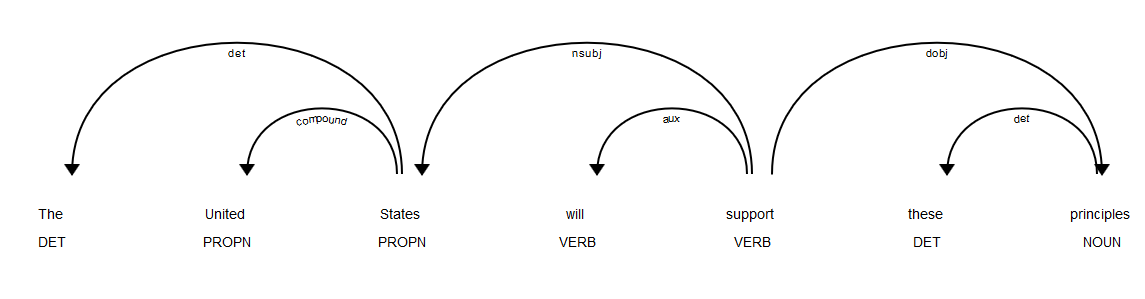

In [ ]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):

    doc = nlp(text)

    sent = []

    for token in doc:

        # if the token is a verb
        if (token.pos_=='VERB'):

            phrase =''

            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:

                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):

                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:

                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):

                            phrase += ' '+sub_tok.text
                            sent.append(phrase)

    return sent

In [ ]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,2012,﻿I would like to begin today by telling the As...,[]
1,2012,"Chris was born in a town called Grass Valley,...",[]
2,2012,"As a young man, Chris joined the Peace Corps ...",[Chris join Corps]
3,2012,He would carry that commitment throughout his...,[He carry commitment]
4,2012,"As a diplomat, he worked from Egypt to Syria,...",[]


In [ ]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule3.columns)

for row in range(len(df_rule3)):

    if len(df_rule3.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule3.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-55-cbdd7781f2a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule3.loc[row,:])
<ipython-input-55-cbdd7781f2a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule3.loc[row,:])
<ipython-input-55-cbdd7781f2a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule3.loc[row,:])
<ipython-input-55-cbdd7781f2a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule3.loc[row,:])
<ipython-input-55-cbdd7781f2a5>:7: FutureWarning: The frame.append method is deprecat

In [ ]:
df_show.head()

,Year,Sentence,Output
0,2012,"As a young man, Chris joined the Peace Corps ...",[Chris join Corps]
1,2012,He would carry that commitment throughout his...,[He carry commitment]
2,2012,"As America’s representative, he helped the Li...",[he help people]
3,2012,"After the revolution, he supported the birth ...","[he support birth, Libyans hold elections]"
4,2012,Chris Stevens loved his work,[Stevens love work]


In [ ]:
# number of outputs
df_show.shape

(4021, 3)

In [ ]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):

    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']

    # iterating over all the outputs from the sentence
    for sent in output:

        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]

        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)

        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [ ]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,"As a young man, Chris joined the Peace Corps ...",2012,[Chris],join,[Corps]
1,He would carry that commitment throughout his...,2012,[He],carry,[commitment]
2,"As America’s representative, he helped the Li...",2012,[he],help,[people]
3,"After the revolution, he supported the birth ...",2012,[he],support,[birth]
4,"After the revolution, he supported the birth ...",2012,[Libyans],hold,[elections]


In [ ]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

have       351
take       162
make       139
support     99
give        92
see         80
seek        59
provide     57
face        57
build       52
Name: Verb, dtype: int64

In [ ]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
3,"After the revolution, he supported the birth ...",2012,[he],support,[birth]
18,"Since then, the world has been captivated by ...",2012,[States],support,[forces]
21,"We supported change in Egypt, because our sup...",2012,[We],support,[change]
45,We do not do so because we support hateful sp...,2012,[we],support,[speech]
174,The United States strongly supports his leade...,1997,[States],support,[leadership]
222,We will support the consolidation of market d...,1993,[We],support,[consolidation]
271,But the reason we have supported such mission...,1993,[we],support,[missions]
278,We support the creation of a genuine United N...,1993,[We],support,[creation]
314,Those names include a man who supported his w...,2001,[who],support,[wife]
438,The United States strongly supports the basic...,1979,[States],support,[elements]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [ ]:
from spacy import displacy
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [ ]:
# function for rule 4
def rule4(text):

    doc = nlp(text)

    pat = []

    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):

            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '

            if len(phrase)!=0:
                phrase += token.text

        if  len(phrase)!=0:
            pat.append(phrase)


    return pat

In [ ]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)

    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,2012,﻿I would like to begin today by telling the As...,[]
1,2012,"Chris was born in a town called Grass Valley,...",[]
2,2012,"As a young man, Chris joined the Peace Corps ...",[young man]
3,2012,He would carry that commitment throughout his...,[]
4,2012,"As a diplomat, he worked from Egypt to Syria,...",[]


In [ ]:
# selecting non-empty outputs
df_show = pd.DataFrame(columns=df_rule4.columns)

for row in range(len(df_rule4)):

    if len(df_rule4.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule4.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-66-467b66dfd267>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule4.loc[row,:])
<ipython-input-66-467b66dfd267>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule4.loc[row,:])
<ipython-input-66-467b66dfd267>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule4.loc[row,:])
<ipython-input-66-467b66dfd267>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule4.loc[row,:])
<ipython-input-66-467b66dfd267>:7: FutureWarning: The frame.append method is deprecat

In [ ]:
# number of matches
df_show.shape

(6218, 3)

In [ ]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,2012,"As a young man, Chris joined the Peace Corps ...",[young man]
1,2012,He was known for walking the streets of the c...,"[local food, many people, broad smile]"
2,2012,"Chris went to Benghazi, arriving on a cargo s...","[cargo ship, early days, Libyan revolution]"
3,2012,"As America’s representative, he helped the Li...","[Libyan people, violent conflict]"
4,2012,"After the revolution, he supported the birth ...","[new democracy, new institutions]"
5,2012,"Two weeks ago, he travelled to Benghazi to re...",[new cultural center]
6,2012,"Like his fellow Foreign Service officers, he ...","[fellow Service officers, international cooper..."
7,2012,"He acted with humility, but he also stood up ...",[own destiny]
8,2012,The attacks on the American civilians in Beng...,[American civilians]
9,2012,We are grateful for the assistance we receive...,[Libyan people]


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [ ]:
# modifying rule 4
def rule4_mod(text,index):

    doc = nlp(text)

    phrase = ''

    # iterate over tokens
    for token in doc:

        if token.i == index:

            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break

    return phrase

In [ ]:
# using rule 3 and rule 4
def rule3_mod(text):

    doc = nlp(text)

    sent = []

    for token in doc:
        # root word
        if (token.pos_=='VERB'):

            phrase =''

            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:

                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):

                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)

                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:

                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):

                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)

                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)

    return sent

In [ ]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,2012,﻿I would like to begin today by telling the As...,[]
1,2012,"Chris was born in a town called Grass Valley,...",[]
2,2012,"As a young man, Chris joined the Peace Corps ...",[ Chris join Peace Corps]
3,2012,He would carry that commitment throughout his...,[ He carry commitment]
4,2012,"As a diplomat, he worked from Egypt to Syria,...",[]


In [ ]:
# selecting non-empty outputs
df_show_mod = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):

    if len(df_rule.loc[row,'Output'])!=0:
        df_show_mod = df_show_mod.append(df_rule.loc[row,:])

# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-73-8971d3ad55d1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show_mod = df_show_mod.append(df_rule.loc[row,:])
<ipython-input-73-8971d3ad55d1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show_mod = df_show_mod.append(df_rule.loc[row,:])
<ipython-input-73-8971d3ad55d1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show_mod = df_show_mod.append(df_rule.loc[row,:])
<ipython-input-73-8971d3ad55d1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show_mod = df_show_mod.append(df_rule.loc[row,:])
<ipython-input-73-8971d3ad55d1>:7: FutureWarning: The fra

In [ ]:
# number of matches
df_show_mod.shape

(4021, 3)

In [ ]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,2012,"As a young man, Chris joined the Peace Corps ...",[ Chris join Peace Corps]
1,2012,He would carry that commitment throughout his...,[ He carry commitment]
2,2012,"As America’s representative, he helped the Li...",[ he help Libyan people]
3,2012,"After the revolution, he supported the birth ...","[ he support birth, Libyans hold elections]"
4,2012,Chris Stevens loved his work,[ Chris Stevens love work]
5,2012,"He took pride in the country he served, and h...","[ He take pride, he see dignity]"
6,2012,I tell this story because Chris Stevens embod...,[ I tell story]
7,2012,"Like his fellow Foreign Service officers, he ...",[ he build bridges]
8,2012,"I also appreciate that, in recent days, the l...",[ leaders take steps]
9,2012,They are also an assault on the very ideals ...,"[ United Nations found notion, people resolve..."


In [ ]:
# Sample sentence
print(df_show_mod.loc[4,'Output'])
print(df_show_mod.loc[4,'Sentence'])

[' Chris Stevens love work']
 Chris Stevens loved his work


In [ ]:
# Sample sentence
print(df_show_mod.loc[17,'Output'])
print(df_show_mod.loc[17,'Sentence'])

[' We take positions']
 We have taken those positions because we believe that freedom and self determination are not unique to one culture


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [ ]:


# Sample sentence
from spacy import displacy
displacy.render(nlp('''We all believe the benefits of globalization must
be allocated more broadly within and among societies'''),
                style='dep',jupyter=True)

In [ ]:
# rule 5 function
def rule5(text):

    doc = nlp(text)

    sent = []

    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''

            # if its head word is a noun
            if token.head.pos_=='NOUN':

                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text

                if len(phrase)>2:
                    sent.append(phrase)

    return sent

In [ ]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']

    # rule
    output = rule5(sent)

    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,2012,﻿I would like to begin today by telling the As...,[]
1,2012,"Chris was born in a town called Grass Valley,...",[son of lawyer]
2,2012,"As a young man, Chris joined the Peace Corps ...",[people of Africa]
3,2012,He would carry that commitment throughout his...,[]
4,2012,"As a diplomat, he worked from Egypt to Syria,...",[]


In [ ]:
# select non-empty outputs
df_show = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):

    if len(df_rule.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule.loc[row,:])

# reset the index
df_show.reset_index(inplace = True, drop = True)

Streaming output truncated to the last 5000 lines.
<ipython-input-82-7ef47fd4b84f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule.loc[row,:])
<ipython-input-82-7ef47fd4b84f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule.loc[row,:])
<ipython-input-82-7ef47fd4b84f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule.loc[row,:])
<ipython-input-82-7ef47fd4b84f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_show = df_show.append(df_rule.loc[row,:])
<ipython-input-82-7ef47fd4b84f>:7: FutureWarning: The frame.append method is deprecated a

In [ ]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,2012,"Chris was born in a town called Grass Valley,...",[son of lawyer]
1,2012,"As a young man, Chris joined the Peace Corps ...",[people of Africa]
2,2012,He was known for walking the streets of the c...,[streets of cities]
3,2012,"Chris went to Benghazi, arriving on a cargo s...",[days of revolution]
4,2012,"As America’s representative, he helped the Li...","[vision for future, rights of Libyans]"


In [ ]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):

    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']

    # iterating over all the outputs from the sentence
    for sent in output:

        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]

        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)

        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [ ]:
# first 10 rows
df_sep.head(10)

,Sentence,Year,Noun1,Preposition,Noun2
0,"Chris was born in a town called Grass Valley,...",2012,son,of,[lawyer]
1,"As a young man, Chris joined the Peace Corps ...",2012,people,of,[Africa]
2,He was known for walking the streets of the c...,2012,streets,of,[cities]
3,"Chris went to Benghazi, arriving on a cargo s...",2012,days,of,[revolution]
4,"As America’s representative, he helped the Li...",2012,vision,for,[future]
5,"As America’s representative, he helped the Li...",2012,rights,of,[Libyans]
6,"After the revolution, he supported the birth ...",2012,birth,of,[democracy]
7,"After the revolution, he supported the birth ...",2012,decades,of,[dictatorship]
8,"Like his fellow Foreign Service officers, he ...",2012,bridges,across,[oceans]
9,"He acted with humility, but he also stood up ...",2012,set,of,[principles]


In [ ]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

of         6110
in         1211
for         887
to          567
on          343
with        250
between     202
from        139
as          120
against     117
Name: Preposition, dtype: int64

In [ ]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
69,"Like me, the majority of Americans are Christ...",2012,blasphemy,against,[beliefs]
74,"We do so because, given the power of faith in...",2012,weapon,against,[speech]
124,Let us condemn incitement against Sufi Muslim...,2012,incitement,against,[pilgrims]
269,Two years ago I called upon all the members o...,1997,fight,against,[forces]
286,To punish those responsible for crimes agains...,1997,crimes,against,[humanity]
492,We will also reform our own system of export ...,1993,battle,against,[proliferation]
596,We will defend ourselves and our future again...,2001,future,against,[terror]
636,Not every nation will be part of every action...,2001,action,against,[enemy]
643,Some nations want to play their part in the f...,2001,fight,against,[terror]
648,We are making progress against military targe...,2001,progress,against,[targets]
